### Range of efficiencies for colored solar cells
One basic question for decorative (colored) solar cells is how does the efficiency compare to
that of a non-decorative cell for a given color?  That is, if I want to make a red solar cell, how closely can I get to the conversion efficiency of a black (perfectly absorbing) solar cell?

To begin with, consider an idealized reflection spectrum of a step function with fixed width that gives rise to a particular color.  After initializing a structure in wptherml, we will assign
it such a reflection (and a complementary emissivity) using the function 
self.step_reflectivity(lambda_0, d_lambda)
where lambda_0 is the center wavelength and d_lambda is the width.

The following code will set up such a structure, render its color, classify its color (as red, orange, yello, green, blue, indigo, or violet), and compute its efficiency.

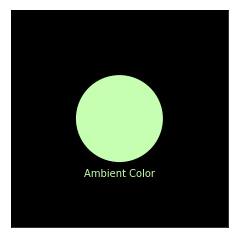

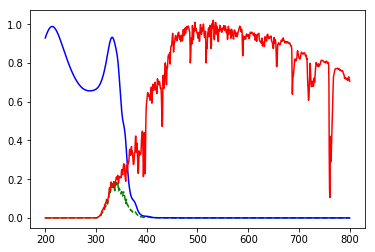

In [11]:
from wptherml.wpml import multilayer
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from wptherml.datalib import datalib
from matplotlib import cm
import numpy as np
from scipy.optimize import minimize

### dictionary that stores basic properties 
### of the multilayer structure you want to simulate

l = 500e-9
d1 = l/(4*1.45)
d2 = l/(4*2.4)
structure = {
        'Temperature': 300,
        'Material_List' : ['Air','SiO2', 'TiO2', 'SiO2', 'TiO2', 'SiO2', 'TiO2', 'SiO2', 'TiO2', 'SiO2', 'TiO2', 'SiO2', 'TiO2', 'SiO2', 'TiO2', 'Air'], 
        'Thickness_List': [0, d1, d2, d1, d2, d1, d2, d1, d2, d1, d2, d1, d2, d1, d2, 0],
        'Lambda_List': [200e-9, 800e-9, 1000]
     
}

BR = multilayer(structure)
#plt.plot(BR.lambda_array*1e9, BR.reflectivity_array)
#plt.show()
BR.ambient_color()


AM = datalib.AM(BR.lambda_array)


### This will plot solar absorbance vs wavelength
plt.plot(BR.lambda_array*1e9, BR.emissivity_array*AM/(1.4*1e9), 'g--')
plt.plot(BR.lambda_array*1e9, BR.emissivity_array, 'blue')
plt.plot(BR.lambda_array*1e9, AM/(1.4*1e9), 'red')
plt.show()

